In [1]:
from qs_mps.sparse_hamiltonians_and_operators import *
from scipy.sparse import csr_array
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np
from qs_mps.mps_class import MPS

In [2]:
L = 6
eps = 1e-5
H_xzx = sparse_cluster_hamiltonian(J=1, h_t=0, L=L, eps=eps)

In [3]:
e, v = diagonalization(H_xzx, sparse=False)
print(e)

[-4.00001000e+00 -4.00001000e+00 -3.99999000e+00 -3.99999000e+00
 -2.00001000e+00 -2.00001000e+00 -2.00001000e+00 -2.00001000e+00
 -2.00001000e+00 -2.00001000e+00 -2.00001000e+00 -2.00001000e+00
 -1.99999000e+00 -1.99999000e+00 -1.99999000e+00 -1.99999000e+00
 -1.99999000e+00 -1.99999000e+00 -1.99999000e+00 -1.99999000e+00
 -1.00000000e-05 -1.00000000e-05 -1.00000000e-05 -1.00000000e-05
 -1.00000000e-05 -1.00000000e-05 -1.00000000e-05 -1.00000000e-05
 -1.00000000e-05 -1.00000000e-05 -1.00000000e-05 -9.99999999e-06
  1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
  1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
  1.00000000e-05  1.00000000e-05  1.00000000e-05  1.00000000e-05
  1.99999000e+00  1.99999000e+00  1.99999000e+00  1.99999000e+00
  1.99999000e+00  1.99999000e+00  1.99999000e+00  1.99999000e+00
  2.00001000e+00  2.00001000e+00  2.00001000e+00  2.00001000e+00
  2.00001000e+00  2.00001000e+00  2.00001000e+00  2.00001000e+00
  3.99999000e+00  3.99999

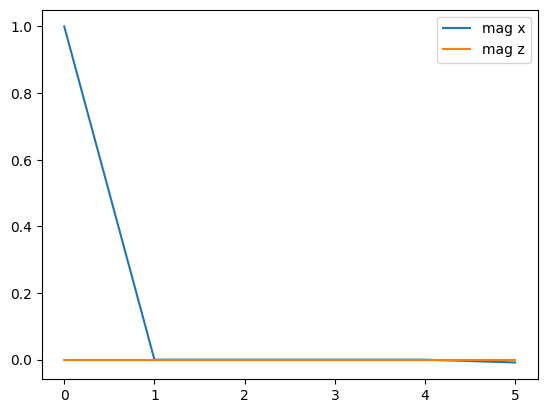

In [7]:
psi = v[:,0]
mag_x = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

In [5]:
psi

array([ 0.00074492-0.j, -0.17677513+0.j,  0.00074492+0.j, -0.17677513+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
        0.00074492+0.j, -0.17677513+0.j,  0.00074492+0.j, -0.17677513+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
        0.00074492+0.j, -0.17677513+0.j,  0.00074492+0.j, -0.17677513+0.j,
        0.17677513+0.j, -0.00074492+0.j, -0.17677513+0.j,  0.00074492+0.j,
       -0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,  0.17677513+0.j,
        0.00074492+0.j, -0.17677513+0.j,  0.00074492+0.j, -0.17677513+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
        0.00074492+0.j, -0.17677513+0.j,  0.00074492+0.j, -0.17677513+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
       -0.17677513+0.j,  0.00074492+0.j,  0.17677513+0.j, -0.00074492+0.j,
        0.00074492+0.j, -

## Add an external field

In [9]:
def cluster(L: int, lamb: float, J: float=1, eps: float=1e-5, long: str="X", trans: str="Z", deg_method: int=1):
    if long == "X":
        long_op = sparse_pauli_x
        trans_op = sparse_pauli_z
    elif long == "Z":
        long_op = sparse_pauli_z
        trans_op = sparse_pauli_x
    H_zxz = csr_array((2**L, 2**L), dtype=complex)
    H_x = csr_array((2**L, 2**L), dtype=complex)
    for i in range(L-2):
        H_zxz += long_op(n=i, L=L) @ trans_op(n=i+1, L=L) @ long_op(n=i+2, L=L)
    for i in range(L):
        H_x += trans_op(n=i,L=L)
    if deg_method == 1:
        H_deg = long_op(n=0, L=L) @ trans_op(n=1, L=L)
    elif deg_method == 2:
        H_deg = long_op(n=0, L=L)
    return - J*H_zxz - lamb*H_x - eps*H_deg

h: 2.0
h: 1.8666666666666667
h: 1.7333333333333334
h: 1.6
h: 1.4666666666666666
h: 1.3333333333333333
h: 1.2
h: 1.0666666666666667
h: 0.9333333333333333
h: 0.8
h: 0.6666666666666666
h: 0.5333333333333333
h: 0.4
h: 0.26666666666666666
h: 0.13333333333333333
h: 0.0


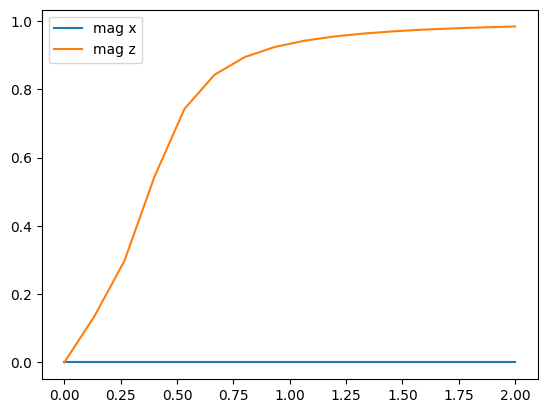

In [12]:
L = 15
mag_x = []
mag_z = []
v0 = np.zeros(2**L)
v0[0] = 1
lambs = np.linspace(0,2,16).tolist()
lambs.reverse()

for lamb in lambs:
    print(f"h: {lamb}")
    H = cluster(L,lamb, J=1/2, deg_method=2)
    e, v = eigs(H, k=1, v0=v0)
    # e, v = np.linalg.eig(H.toarray())
    psi = v[:,0]
    mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
    mag_z.append(mag)
    v0 = psi
plt.plot(lambs, mag_x,label="mag x")
plt.plot(lambs, mag_z,label="mag z")
plt.legend()
plt.show()


In [13]:
L = 15
mag_x = []
mag_z = []
rdms = []
lambs = np.linspace(0,2,16).tolist()
Js = np.linspace(0,2,16)
lambs.reverse()

v0 = np.zeros(2**L)
v0[0] = 1

for J in Js:
    mag_x_J = []
    mag_z_J = []
    rdms_J = []
    for lamb in lambs:
        print(f"h: {lamb}, J: {J}")
        H = cluster(L,lamb, J=J, deg_method=2)
        e, v = eigs(H, k=1, v0=v0)
        # e, v = np.linalg.eig(H.toarray())
        psi = v[:,0]
        mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
        mag_x_J.append(mag)
        mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
        mag_z_J.append(mag)
        if lamb == lambs[0]:
            print("here")
            v0_J = psi
        v0 = psi
        chain = MPS(L=L, d=2, model="Cluster", chi=128)
        chain.vector_to_mps(psi, chi=128)
        rdm = chain.reduced_density_matrix([L//2])
        rdms_J.append(rdm)
    mag_x.append(mag_x_J)
    mag_z.append(mag_z_J)
    rdms_J.reverse()
    rdms.append(rdms_J)
    v0 = v0_J
plt.matshow(mag_z)
plt.colorbar()

h: 2.0, J: 0.0
here
h: 1.8666666666666667, J: 0.0
h: 1.7333333333333334, J: 0.0
h: 1.6, J: 0.0
h: 1.4666666666666666, J: 0.0
h: 1.3333333333333333, J: 0.0
h: 1.2, J: 0.0
h: 1.0666666666666667, J: 0.0
h: 0.9333333333333333, J: 0.0
h: 0.8, J: 0.0
h: 0.6666666666666666, J: 0.0
h: 0.5333333333333333, J: 0.0
h: 0.4, J: 0.0
h: 0.26666666666666666, J: 0.0
h: 0.13333333333333333, J: 0.0
h: 0.0, J: 0.0
h: 2.0, J: 0.13333333333333333
here
h: 1.8666666666666667, J: 0.13333333333333333
h: 1.7333333333333334, J: 0.13333333333333333
h: 1.6, J: 0.13333333333333333
h: 1.4666666666666666, J: 0.13333333333333333
h: 1.3333333333333333, J: 0.13333333333333333
h: 1.2, J: 0.13333333333333333
h: 1.0666666666666667, J: 0.13333333333333333
h: 0.9333333333333333, J: 0.13333333333333333
h: 0.8, J: 0.13333333333333333
h: 0.6666666666666666, J: 0.13333333333333333
h: 0.5333333333333333, J: 0.13333333333333333
h: 0.4, J: 0.13333333333333333
h: 0.26666666666666666, J: 0.13333333333333333
h: 0.13333333333333333, J: 0

In [4]:
path_rdms = "C:/Users/HP/Desktop/fidelity-phase-tran"
np.save(f"{path_rdms}/results/data/X_1-rdms_Cluster_L_15_h-J_0.0-2.0_delta_32_degeneracy_method_1_guess_path.npy", rdms)